In [1]:

# # IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# # TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# # THEN FEEL FREE TO DELETE THIS CELL.
# # NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# # ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# # NOTEBOOK.

# import os
# import sys
# from tempfile import NamedTemporaryFile
# from urllib.request import urlopen
# from urllib.parse import unquote, urlparse
# from urllib.error import HTTPError
# from zipfile import ZipFile
# import tarfile
# import shutil

# CHUNK_SIZE = 40960
# DATA_SOURCE_MAPPING = 'aiml-general-championship:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F71608%2F7895811%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240316%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240316T182126Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D210782040be11a15912c28fde87c2d38c449d68073d68a264de08fb384bb64078935b6fbead9d64eb8d04fe528e8a1dac8db600fa0671679cfbd9065ca2bca1ba5447913c3ef792d420ed4afc54fe56120759053657d0906ca42ed91c3f885453c9dc44c3f9e876f16930e21fed9ca4fc8967bbaf5c43d3ee522a446cc3ca44541139d9a714af2193ed774841614ade3f823fb553ebedaccf6c4b491b74b4fb7af54a727f6a555492377335777fdb4ef61a29af5196715719482221b8566b028829d53e35104019a706f4e364d1abad24bcda31269be6b6814d17d023b6aef1808ace6cdb0a9e59a4ea2512051fc592aca639c1f7d24db9f02a633e1f445c91b'

# KAGGLE_INPUT_PATH='/kaggle/input'
# KAGGLE_WORKING_PATH='/kaggle/working'
# KAGGLE_SYMLINK='kaggle'

# !umount /kaggle/input/ 2> /dev/null
# shutil.rmtree('/kaggle/input', ignore_errors=True)
# os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
# os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# try:
#   os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
# except FileExistsError:
#   pass
# try:
#   os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
# except FileExistsError:
#   pass

# for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
#     directory, download_url_encoded = data_source_mapping.split(':')
#     download_url = unquote(download_url_encoded)
#     filename = urlparse(download_url).path
#     destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
#     try:
#         with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
#             total_length = fileres.headers['content-length']
#             print(f'Downloading {directory}, {total_length} bytes compressed')
#             dl = 0
#             data = fileres.read(CHUNK_SIZE)
#             while len(data) > 0:
#                 dl += len(data)
#                 tfile.write(data)
#                 done = int(50 * dl / int(total_length))
#                 sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
#                 sys.stdout.flush()
#                 data = fileres.read(CHUNK_SIZE)
#             if filename.endswith('.zip'):
#               with ZipFile(tfile) as zfile:
#                 zfile.extractall(destination_path)
#             else:
#               with tarfile.open(tfile.name) as tarfile:
#                 tarfile.extractall(destination_path)
#             print(f'\nDownloaded and uncompressed: {directory}')
#     except HTTPError as e:
#         print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
#         continue
#     except OSError as e:
#         print(f'Failed to load {download_url} to path {destination_path}')
#         continue

# print('Data source import complete.')


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# data_path = '/content/drive/MyDrive/kaggle/aiml-general-championship'

In [3]:
from timeit import default_timer as timer
from datetime import timedelta
complet_code_start_time = timer()

In [4]:
class Config:
    '''Code running platform'''
    # colab kaggle ieor
    platform = 'kaggle'
    '''general'''
    import os
    debug = False
    seed = 42
    num_workers = os.cpu_count()

    '''data'''
    batch_size = 16

    '''model'''
    # 'regnety_002', 'efficientnet_b3', 'efficientnet_b0',
    # 'vit_base_patch16_224', 'tf_efficientnet_b4_ns'
    # model_name = 'tf_efficientnet_b3_ns'
    # model_name = 'densenet121'
    model_name = 'densenet201'
    # number of predictors
    targets = 7
    # input image size send to network can be like 256, 512, 768, 1028
    input_size = 512
    # freeze backbone network
    freeze_backbone = False

    '''training'''
    n_fold = 5
    trn_folds = [0, 1, 2, 3, 4]
    epochs = 1000
    print_freq = 10
    lr = 1e-4
    train = True
    # for fp16 training change it to 16
    precision = 16
    patience = 5

    '''gradients'''
    #adamw', 'adam'
    optimizer = 'adamw'
    weight_decay = 1e-6
    gradient_accumulation_steps= 1
    max_grad_norm = 1000

    '''lr scheduler'''
    #'ReduceLROnPlateau', 'CosineAnnealingLR', 'CosineAnnealingWarmRestarts'
    lr_scheduler = 'CosineAnnealingWarmRestarts'
    factor = 0.2 # ReduceLROnPlateau
    patience = 4 # ReduceLROnPlateau
    eps = 1e-6 # ReduceLROnPlateau
    T_max = 15 # CosineAnnealingLR
    T_0 = 10 # CosineAnnealingWarmRestarts
    min_lr = 1e-6
    warmup_epochs = 0
    multiplier = 10

    '''loggers'''
    loggers = True

# Installing dependencies

In [5]:
# !pip install timm -q
# !python -m pip install lightning -q
# !pip install -U albumentations -q

# Import Dependencies

In [6]:
import os
import gc
import random
import time
import math

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2

import torch
import torch.nn as nn
import torch.nn.functional as F

import pytorch_lightning as pl
import torchmetrics as metrics
import timm

# from kaggle_datasets import KaggleDatasets

import sklearn.model_selection as ms
from scipy.stats import mode, rankdata, gmean

from functools import partial

import warnings
warnings.filterwarnings('ignore')

In [7]:
if Config.platform == 'kaggle':
  data_source = "/kaggle/input/aiml-general-championship/"
if Config.platform == 'colab':
  data_source = "/content/drive/MyDrive/kaggle/aiml-general-championship/HAM/"
if Config.platform == 'ieor':
  data_source = "/kaggle/input/aiml-general-championship/"

train_data_path = data_source + "KCDH2024_Training_Input_10K/KCDH2024_Training_Input_10K"
test_data_path =  data_source + "KCDH2024_Test_Input/KCDH2024_Test_Input"
print(train_data_path)

/kaggle/input/aiml-general-championship/KCDH2024_Training_Input_10K/KCDH2024_Training_Input_10K


In [8]:
train_csv = pd.read_csv(data_source + "KCDH2024_Training_GroundTruth.csv")
train_csv.head(15)

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0,1,0,0,0,0,0
1,ISIC_0024307,0,1,0,0,0,0,0
2,ISIC_0024308,0,1,0,0,0,0,0
3,ISIC_0024309,0,1,0,0,0,0,0
4,ISIC_0024310,1,0,0,0,0,0,0
5,ISIC_0024311,0,1,0,0,0,0,0
6,ISIC_0024312,0,0,0,0,1,0,0
7,ISIC_0024313,1,0,0,0,0,0,0
8,ISIC_0024314,0,1,0,0,0,0,0
9,ISIC_0024315,1,0,0,0,0,0,0


In [9]:
"number of training samples", len(train_csv)

('number of training samples', 10015)

In [10]:
"label columns", train_csv.columns[1:]

('label columns',
 Index(['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'], dtype='object'))

In [11]:
"Check if any column has multiple labels", np.argmax(np.sum(train_csv[train_csv.columns[1:]].values, axis=1) > 1)

('Check if any column has multiple labels', 0)

Since 0, this implies all rows are single labels.

In [12]:
new_train_df = train_csv.copy()
new_train_df["classes"] = np.argmax(new_train_df[new_train_df.columns[1:]].values, axis=1)
new_train_df.head(15)

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC,classes
0,ISIC_0024306,0,1,0,0,0,0,0,1
1,ISIC_0024307,0,1,0,0,0,0,0,1
2,ISIC_0024308,0,1,0,0,0,0,0,1
3,ISIC_0024309,0,1,0,0,0,0,0,1
4,ISIC_0024310,1,0,0,0,0,0,0,0
5,ISIC_0024311,0,1,0,0,0,0,0,1
6,ISIC_0024312,0,0,0,0,1,0,0,4
7,ISIC_0024313,1,0,0,0,0,0,0,0
8,ISIC_0024314,0,1,0,0,0,0,0,1
9,ISIC_0024315,1,0,0,0,0,0,0,0


remove bad images those are in csv file but not in folder

In [13]:
bad_images_index = []
data_files = os.listdir(train_data_path)
for i, img in enumerate(new_train_df["image"]):
    img_path = img+".jpg"
    if not (img_path in data_files):
        bad_images_index.append(i)
len(bad_images_index)

415

In [14]:
"train dataframe shape before bad images", new_train_df.shape

('train dataframe shape before bad images', (10015, 9))

In [15]:
new_train_df = new_train_df.drop(bad_images_index)

In [16]:
"train dataframe shape after remove bad images", new_train_df.shape

('train dataframe shape after remove bad images', (9600, 9))

In [17]:
new_train_df.to_csv("train_data.csv", index=False)

In [18]:
test_files = [x for x in os.listdir(test_data_path) if x.lower().endswith(('.jpg', '.jpeg'))]

In [19]:
"number of test images", len(test_files)

('number of test images', 1512)

In [20]:
test_df = pd.DataFrame.from_dict({"ID": sorted([x.split(".")[0] for x in test_files])})
test_df["Class"] = 0
test_df.head()

,ID,Class
0,ISIC_0034524,0
1,ISIC_0034525,0
2,ISIC_0034526,0
3,ISIC_0034527,0
4,ISIC_0034528,0


In [21]:
test_df.to_csv("test_data.csv", index=False)

In [22]:
train_csv = pd.read_csv("train_data.csv")
test_csv = pd.read_csv("test_data.csv")

In [23]:
train_csv["path"] = train_csv["image"].apply(lambda x: os.path.join(train_data_path, x+".jpg"))
test_csv["path"] = test_csv["ID"].apply(lambda x: os.path.join(test_data_path, x+".jpg"))

In [24]:
train_csv.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC,classes,path
0,ISIC_0024306,0,1,0,0,0,0,0,1,/kaggle/input/aiml-general-championship/KCDH20...
1,ISIC_0024307,0,1,0,0,0,0,0,1,/kaggle/input/aiml-general-championship/KCDH20...
2,ISIC_0024308,0,1,0,0,0,0,0,1,/kaggle/input/aiml-general-championship/KCDH20...
3,ISIC_0024309,0,1,0,0,0,0,0,1,/kaggle/input/aiml-general-championship/KCDH20...
4,ISIC_0024310,1,0,0,0,0,0,0,0,/kaggle/input/aiml-general-championship/KCDH20...


In [25]:
test_csv.head()

,ID,Class,path
0,ISIC_0034524,0,/kaggle/input/aiml-general-championship/KCDH20...
1,ISIC_0034525,0,/kaggle/input/aiml-general-championship/KCDH20...
2,ISIC_0034526,0,/kaggle/input/aiml-general-championship/KCDH20...
3,ISIC_0034527,0,/kaggle/input/aiml-general-championship/KCDH20...
4,ISIC_0034528,0,/kaggle/input/aiml-general-championship/KCDH20...


In [26]:
# if debug mode use only 1000 samples for testing only make debug=False for actual training
if Config.debug:
    print("debug mode on")
    Config.epochs = 2
    Config.print_freq = 100
    Config.trn_folds = [0]
    Config.loggers = False
    #train_csv = train_csv.sample(n=1000, random_state=Config.seed).reset_index(drop=True)
else:
    Config.loggers = True
    print("debug mode off")

debug mode off


In [27]:
pl.seed_everything(Config.seed)

42

In [28]:
Config.target_col = "classes"

In [29]:
class_counts = train_csv[Config.target_col].value_counts().to_dict()
"Unique class counts", class_counts

('Unique class counts',
 {1: 6457, 4: 1055, 0: 1015, 2: 495, 3: 327, 6: 138, 5: 113})

# Define Helpers

In [30]:
class CrossValidation:
    def __init__(self, df, shuffle,random_state=None):
        self.df = df
        self.random_state = random_state
        self.shuffle = shuffle
        if shuffle is True:
            self.df = df.sample(frac=1,
                random_state=self.random_state).reset_index(drop=True)
        else:
            self.random_state=None

    def hold_out_split(self,percent,stratify=None):
        if stratify is not None:
            y = self.df[stratify]
            train,val = ms.train_test_split(self.df, test_size=percent/100,
                stratify=y, random_state=self.random_state)
            return train,val
        size = len(self.df) - int(len(self.df)*(percent/100))
        train = self.df.iloc[:size,:]
        val = self.df.iloc[size:,:]
        return train, val

    def kfold_split(self, splits, stratify=None):
        if stratify is not None:
            kf = ms.StratifiedKFold(n_splits=splits,
                                    shuffle=self.shuffle,
                                    random_state=self.random_state
                                    )
            y = self.df[stratify]
            for train, val in kf.split(X=self.df,y=y):
                t = self.df.iloc[train,:]
                v = self.df.iloc[val, :]
                yield t, v
        else:
            kf = ms.KFold(n_splits=splits, shuffle=self.shuffle,
                random_state=self.random_state)
            for train, val in kf.split(X=self.df):
                t = self.df.iloc[train,:]
                v = self.df.iloc[val, :]
                yield t, v

### Dataset loader helper

In [31]:
class GCDataset(torch.utils.data.Dataset):
    def __init__(self, csv_file, augmentations=None, test=False):
        super(GCDataset, self).__init__()
        self.csv = csv_file
        self.test = test
        self.augs = augmentations
        self.length = len(self.csv)

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        name = "path"
        path = self.csv.iloc[idx]["path"]
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if self.augs is not None:
            img = self.augs(image=img)['image']
        else:
            img = torch.from_numpy(img).float()
            img = img.permute(2, 0, 1)
        if self.test:
            return img
        label = torch.tensor(self.csv.iloc[idx]["classes"], dtype=torch.int64)
        return img, label

In [32]:
class ImageAugmentations:
    '''
        image_size: resize image to -> (width, height)
        train_augs: include augmentations like random crop, rotation etc training if false then return
                    only resize image as pytorch tensor
    '''
    def __init__(self, image_size, apply_augs=False):
        self.image_size = image_size
        self.apply_augs = apply_augs

    def train_augs(self):
        if self.apply_augs:
            return A.Compose([A.Resize(self.image_size, self.image_size),
                              A.HorizontalFlip(p=.5),
                              A.ChannelShuffle(p=.1),
                              A.ColorJitter(p=.2),
                              A.RandomGamma(p=.1),
                              A.Sharpen(p=.1),
                              A.CoarseDropout(p=0.2),
                              # imagenet normalization
                              A.Normalize(mean=[0.485, 0.456, 0.406],
                                          std=[0.229, 0.224, 0.225],
                                          max_pixel_value=255.0,
                                          p=1.0),
                              ToTensorV2()])
        return A.Compose([A.Resize(self.image_size, self.image_size),
                          A.Normalize(mean=[0.485, 0.456, 0.406],
                                      std=[0.229, 0.224, 0.225],
                                      max_pixel_value=255.0,
                                      p=1.0),
                          ToTensorV2()])

    def valid_augs(self):
        return A.Compose([A.Resize(self.image_size, self.image_size),
                          A.Normalize(mean=[0.485, 0.456, 0.406],
                                      std=[0.229, 0.224, 0.225],
                                      max_pixel_value=255.0,
                                      p=1.0),
                          ToTensorV2()])

### plotting images from dataset

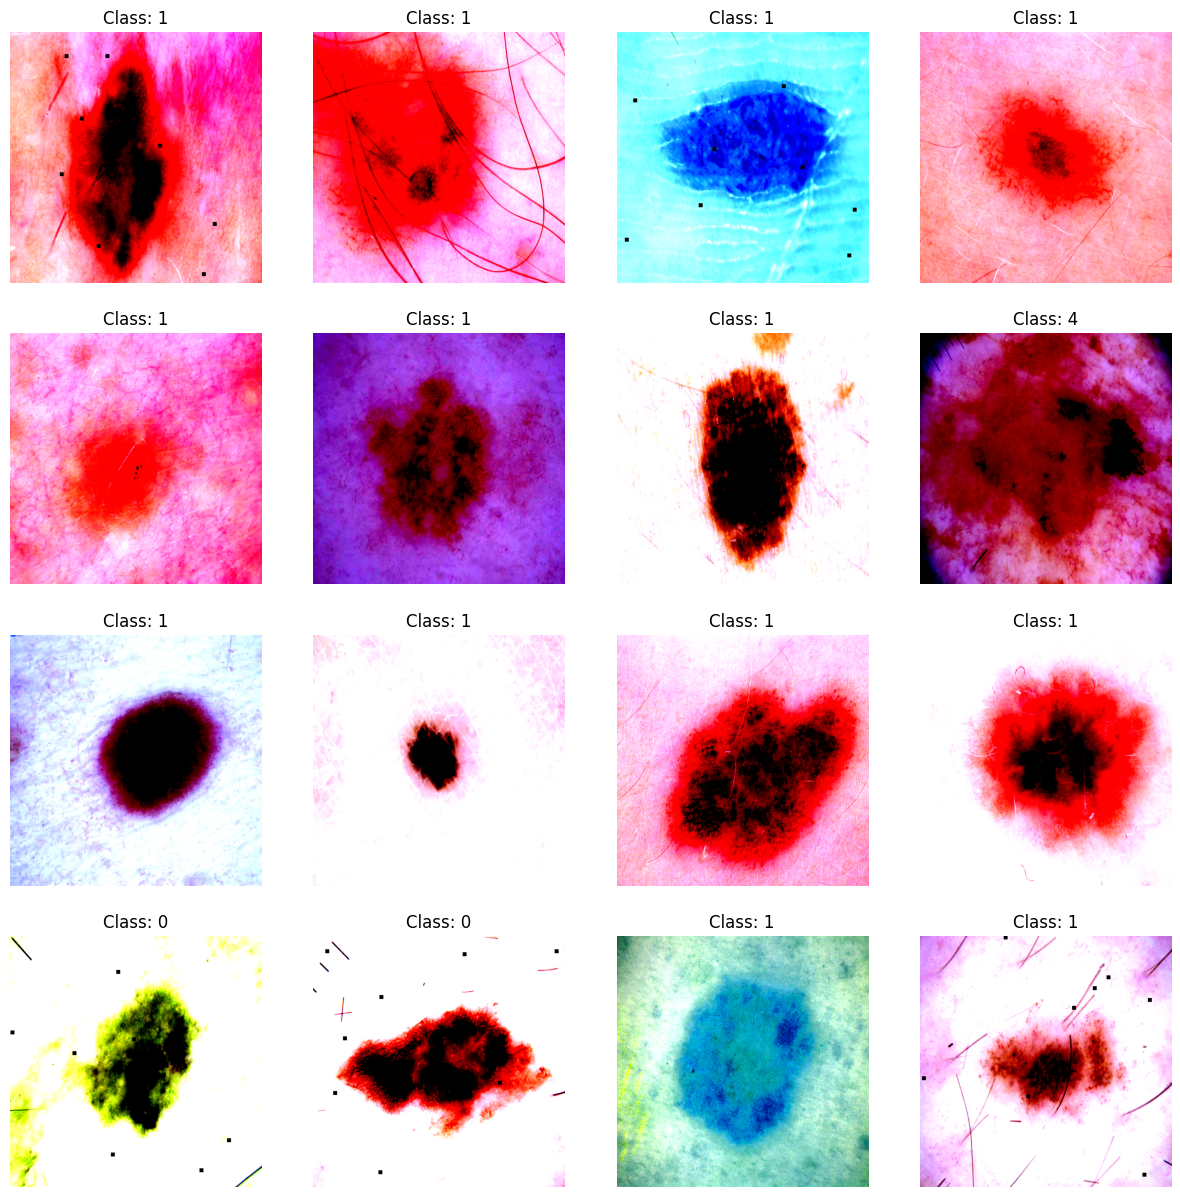

In [33]:
augs = ImageAugmentations(Config.input_size, apply_augs=True)
ds = GCDataset(train_csv, augmentations=augs.train_augs())
loader = torch.utils.data.DataLoader(ds,
                                     shuffle=True,
                                     batch_size=16)
images, labels = next(iter(loader))
plt.figure(figsize=(15, 15))
for step, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4, 4, step+1)
    plt.imshow(image.permute(1, 2, 0).numpy())
    plt.axis('off')
    plt.title(f'Class: {int(label)}')

In [34]:
class GCModel(nn.Module):
    def __init__(self, cfg, pretrained=False):
        super(GCModel, self).__init__()
        self.cfg = cfg
        timm_model = timm.create_model(self.cfg.model_name,
                                       pretrained=pretrained,
                                       in_chans=3)

        if self.cfg.freeze_backbone:
            modules = []
            for module in timm_model.children():
                for param in module.parameters():
                    param.requires_grad = False
                modules.append(module)
        else:
            modules = list(timm_model.children())

        self.classifier = modules[-1]
        cnn_out_features = self.classifier.in_features
        classifier_out_features = self.classifier.out_features

        self.cnn = nn.Sequential(*modules[:-1])
        self.dropout = nn.Dropout(0.2)

        self.classifier = nn.Sequential(nn.Linear(cnn_out_features, 64),
                                        nn.ReLU(),
                                        nn.Linear(64, cfg.targets))

    def forward(self, img):
        cnn_features = self.cnn(img)
        cnn_features = self.dropout(cnn_features)
        return self.classifier(cnn_features)

### Lightning Module

In [35]:
class LitGC(pl.LightningModule):
    def __init__(self, cfg, model, fold, class_weights: torch.Tensor = None,):
        super(LitGC, self).__init__()
        self.cfg = cfg
        self.model = model
        if class_weights is not None:
            self.criterion = nn.CrossEntropyLoss(weight=class_weights)
        else:
            self.criterion = nn.CrossEntropyLoss()
        self.auc = metrics.classification.MulticlassAUROC(num_classes=cfg.targets)
        self.acc = metrics.Accuracy(task="multiclass", num_classes=cfg.targets, average='macro')
        self.fold = fold
        self.val_outputs = []
        self.train_outputs = []

    def forward(self, img):
        return self.model(img)

    def configure_optimizers(self):
        self.optimizer = self.__get_optimizer()
        self.lr_scheduler = self.__get_lr_scheduler()
        return {'optimizer': self.optimizer, 'lr_scheduler': self.lr_scheduler}

    def training_step(self, batch, batch_idx):
        img, y = batch
        y_hat = self(img)
        loss = self.criterion(y_hat, y)
        auc = self.auc(y_hat, y)
        acc = self.acc(y_hat, y)
        logs = {'train_loss': loss,
                'train_auc': auc,
                'train_acc': acc,
                'lr': self.optimizer.param_groups[0]['lr']}
        self.train_outputs.append(logs)
        self.log_dict(
            logs,
            on_step=True, on_epoch=True, prog_bar=True, logger=True
        )
        return loss

    def on_train_epoch_end(self):
        outputs = self.train_outputs
        auc = torch.stack([x['train_auc'] for x in outputs]).mean()
        loss = torch.stack([x['train_loss'] for x in outputs]).mean()
        acc = torch.stack([x['train_acc'] for x in outputs]).mean()
        lr = [x['lr'] for x in outputs][-1]
        print(f'Train | LR: {lr} : Epoch {self.current_epoch} : Fold {self.fold} -> loss: {loss}\t AUC: {auc}\t Accuracy: {acc}')
        return outputs

    def validation_step(self, batch, batch_idx):
        img, y = batch
        y_hat = self(img)
        loss = self.criterion(y_hat, y)
        auc = self.auc(y_hat, y)
        acc = self.acc(y_hat, y)
        logs = {'val_loss': loss,
                'val_auc': auc,
                'val_acc': acc}
        self.val_outputs.append(logs)
        self.log_dict(
            logs,
            on_step=True, on_epoch=True, prog_bar=True, logger=True
        )
        return logs

    def on_validation_epoch_end(self):
        outputs = self.val_outputs
        auc = torch.stack([x['val_auc'] for x in outputs]).mean()
        loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        acc = torch.stack([x['val_acc'] for x in outputs]).mean()
        print(f'Validation | Epoch {self.current_epoch} : Fold {self.fold} -> loss: {loss}\t AUC: {auc}\t Accuracy: {acc}')
        return outputs

    def predict_step(self, batch, batch_idx, dataloader_idx=None):
        if isinstance(batch, list):
            img, _ = batch
        else:
            img = batch
        out = self(img)
        return out

    def __get_optimizer(self):
        optimizer = None
        if self.cfg.optimizer == 'adam':
            optimizer = torch.optim.Adam(self.parameters(), lr=self.cfg.lr,
                                         weight_decay=self.cfg.weight_decay,
                                         amsgrad=False)
        elif self.cfg.optimizer == 'adamw':
            optimizer = torch.optim.AdamW(self.parameters(), lr=self.cfg.lr,
                                          weight_decay=self.cfg.weight_decay)
        return optimizer

    def __get_lr_scheduler(self):
        scheduler = None
        if self.cfg.lr_scheduler=='ReduceLROnPlateau':
            scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, mode='min',
                                                                   factor=self.cfg.factor,
                                                                   patience=self.cfg.patience,
                                                                   eps=self.cfg.eps)
        elif self.cfg.lr_scheduler=='CosineAnnealingLR':
            scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(self.optimizer,
                                                                   T_max=self.cfg.T_max,
                                                                   eta_min=self.cfg.min_lr,
                                                                   last_epoch=-1)
        elif self.cfg.lr_scheduler=='CosineAnnealingWarmRestarts':
            scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(self.optimizer,
                                                                             T_0=self.cfg.T_0,
                                                                             eta_min=self.cfg.min_lr,
                                                                             last_epoch=-1)
        return scheduler

### Lightning data module

In [36]:
class GCDataModule(pl.LightningDataModule):
    def __init__(self,
                 train_files,
                 val_files,
                 batch_size: int = 32,
                 image_size: int = Config.input_size,
                 apply_augmentations: bool = False):
        super(GCDataModule, self).__init__()
        self.train_files = train_files
        self.val_files = val_files
        self.batch_size = batch_size
        self.augs = ImageAugmentations(image_size, apply_augs=apply_augmentations)

    def setup(self, stage=None):
        self.train_ds = GCDataset(self.train_files,
                                augmentations=self.augs.train_augs(),
                                test=False)
        self.val_ds = GCDataset(self.val_files,
                                augmentations=self.augs.valid_augs(),
                                test=False)

    def train_dataloader(self):
        return torch.utils.data.DataLoader(self.train_ds,
                                           shuffle=True,
                                           num_workers=Config.num_workers,
                                           pin_memory=True,
                                           drop_last=True,
                                           batch_size=self.batch_size)

    def val_dataloader(self):
        return torch.utils.data.DataLoader(self.val_ds,
                                           shuffle=False,
                                           num_workers=Config.num_workers,
                                           pin_memory=True,
                                           drop_last=False,
                                           batch_size=self.batch_size*2)

In [37]:
def model_checkpointing_callbacks(fold):
    return [pl.callbacks.ModelCheckpoint(monitor='val_loss',
                                         dirpath="./",
                                         save_top_k=1,
                                         save_last=False,
                                         save_weights_only=True,
                                         filename=f'best/{Config.model_name}_best_loss_fold{fold}',
                                         verbose=True,
                                         mode='min'),
            pl.callbacks.ModelCheckpoint(monitor='val_auc',
                                         dirpath="./",
                                         save_top_k=1,
                                         save_last=False,
                                         save_weights_only=True,
                                         filename=f'best/{Config.model_name}_best_auc_fold{fold}',
                                         verbose=True,
                                         mode='max'),
           pl.callbacks.ModelCheckpoint(monitor='val_acc',
                                         dirpath="./",
                                         save_top_k=1,
                                         save_last=False,
                                         save_weights_only=True,
                                         filename=f'best/{Config.model_name}_best_acc_fold{fold}',
                                         verbose=True,
                                         mode='max')]

In [38]:
def get_loggers(fold):
    if Config.loggers:
        return [pl.loggers.CSVLogger("logs", name=f"{Config.model_name}_fold{fold}")]
    return None

# Training

### Finding class weights for calculating cross entropy loss

In [39]:
class_weights_dict = {}
total_samples = len(train_csv)
for key, count in class_counts.items():
    class_weights_dict[key] = total_samples / (len(class_counts) * count)
class_weights_dict =  dict(sorted(class_weights_dict.items()))
"Class weights are", class_weights_dict

('Class weights are',
 {0: 1.3511611541168191,
  1: 0.21239407951503353,
  2: 2.7705627705627704,
  3: 4.193971166448231,
  4: 1.2999322951929586,
  5: 12.13653603034134,
  6: 9.937888198757763})

In [40]:
class_weights = torch.tensor([x for _, x in class_weights_dict.items()],
                             dtype=torch.float32)
"Class weights tensor", class_weights

('Class weights tensor',
 tensor([ 1.3512,  0.2124,  2.7706,  4.1940,  1.2999, 12.1365,  9.9379]))

In [ ]:
if Config.train:
    cv = CrossValidation(train_csv, shuffle=True, random_state=Config.seed)
    for fold, (train_, val_) in enumerate(cv.kfold_split(splits=Config.n_fold)):
        if fold in Config.trn_folds:
            print(f"{'='*10} Fold {fold} {'='*10}")
            datamodule = GCDataModule(train_,
                                      val_,
                                      batch_size=Config.batch_size,
                                      apply_augmentations=True)
            datamodule.setup()
            loggers = get_loggers(fold)
            callbacks = [pl.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=Config.patience,
                                                    mode='min')]
            model = GCModel(Config, pretrained=True)
            checkpoint_callbacks = model_checkpointing_callbacks(fold)
            lit = LitGC(Config, model, fold=fold, class_weights=class_weights)
            trainer_params = {"max_epochs": Config.epochs,
                              "accumulate_grad_batches": Config.gradient_accumulation_steps,
                              "precision": Config.precision,
                              "callbacks": callbacks+checkpoint_callbacks,
                              "logger": loggers}
            trainer = pl.Trainer(**trainer_params)
            # Train the model
            trainer.fit(lit, datamodule)

========== Fold 0 ==========


model.safetensors:   0%|          | 0.00/81.1M [00:00<?, ?B/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Validation | Epoch 0 : Fold 0 -> loss: 1.9713287353515625	 AUC: 0.16918882727622986	 Accuracy: 0.02470238134264946


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation | Epoch 0 : Fold 0 -> loss: 0.9364980459213257	 AUC: 0.6499266028404236	 Accuracy: 0.5683953166007996
Train | LR: 0.0001 : Epoch 0 : Fold 0 -> loss: 1.412808895111084	 AUC: 0.4917786717414856	 Accuracy: 0.36969003081321716


Validation: |          | 0/? [00:00<?, ?it/s]

Validation | Epoch 1 : Fold 0 -> loss: 0.8987997770309448	 AUC: 0.6594796180725098	 Accuracy: 0.5685807466506958
Train | LR: 9.757729755661011e-05 : Epoch 1 : Fold 0 -> loss: 1.2097607851028442	 AUC: 0.5128207206726074	 Accuracy: 0.4236953556537628


Validation: |          | 0/? [00:00<?, ?it/s]

Validation | Epoch 2 : Fold 0 -> loss: 0.8165859580039978	 AUC: 0.6643878817558289	 Accuracy: 0.5946298241615295
Train | LR: 9.05463412215599e-05 : Epoch 2 : Fold 0 -> loss: 1.0702518224716187	 AUC: 0.5243735909461975	 Accuracy: 0.46859464049339294


Validation: |          | 0/? [00:00<?, ?it/s]

Validation | Epoch 3 : Fold 0 -> loss: 0.769822895526886	 AUC: 0.6689773201942444	 Accuracy: 0.6236400604248047
Train | LR: 7.959536998847742e-05 : Epoch 3 : Fold 0 -> loss: 0.9575933218002319	 AUC: 0.5334119200706482	 Accuracy: 0.509248673915863


Validation: |          | 0/? [00:00<?, ?it/s]

Validation | Epoch 4 : Fold 0 -> loss: 0.7142906188964844	 AUC: 0.6734766960144043	 Accuracy: 0.6466267704963684
Train | LR: 6.57963412215599e-05 : Epoch 4 : Fold 0 -> loss: 0.8752416968345642	 AUC: 0.5390794277191162	 Accuracy: 0.5408400297164917


# Saving model

In [ ]:
#Saving the best model
import datetime; time = datetime.datetime.now().strftime("%d%m%y_%S")
model_saving_name = "_".join([Config.model_name,time,".dth"])
print(f"Saving the final model state dictionary...at {model_saving_name}")
torch.save(model.state_dict(), model_saving_name)
print("saved!")

# Inference

In [ ]:
def get_weights_path(fold, mode):
    return os.path.join("best", f"{Config.model_name}_best_{mode}_fold{fold}.ckpt")

In [ ]:
def get_fold_predictions(fold, data, ensemble_fn=None, logits=False):
    print("="*10)
    print("Predictions using Fold: ", fold)
    print("="*10)
    augs = ImageAugmentations(Config.input_size, apply_augs=False)
    ds = GCDataset(data,
                   augmentations=augs.valid_augs(),
                   test=False)
    weights = [get_weights_path(fold, "loss"),
               get_weights_path(fold, "auc"),
               get_weights_path(fold, "acc")]
    preds = []
    for weight in weights:
        print("Using weights: ", weight)
        loader = torch.utils.data.DataLoader(ds,
                                             shuffle=False,
                                             num_workers=Config.num_workers,
                                             pin_memory=True,
                                             drop_last=False,
                                             batch_size=Config.batch_size*2)
        model = GCModel(Config, pretrained=False)
        lit = LitGC.load_from_checkpoint(weight, cfg=Config, model=model, fold=fold, class_weights=class_weights)
        trainer = pl.Trainer()
        predictions = trainer.predict(lit, loader)
        predictions = torch.cat([x for x in predictions]).detach().cpu().numpy()
        preds.append(predictions)
    if ensemble_fn is not None:
        preds = ensemble_fn(preds, logits=logits)
    return preds

In [ ]:
def get_test_fold_predictions(fold, test_csv, tta_steps=0, ensemble_fn=None, logits=False):
    print("="*10)
    print("Predictions using fold", fold)
    print("="*10)
    augs = ImageAugmentations(Config.input_size, apply_augs=True)
    weights = [get_weights_path(fold, "loss"),
               get_weights_path(fold, "auc"),
               get_weights_path(fold, "acc")]
    preds = []
    for weight in weights:
        print("Using weights: ", weight)
        model = GCModel(Config, pretrained=False)
        lit = LitGC.load_from_checkpoint(weight, cfg=Config, model=model, fold=fold, class_weights=class_weights)
        trainer = pl.Trainer()
        for tta in range(tta_steps):
            if tta == 0:
                ds = GCDataset(test_csv,
                               augmentations=augs.valid_augs(),
                               test=True)
            else:
                ds = GCDataset(test_csv,
                               augmentations=augs.train_augs(),
                               test=True)
            loader = torch.utils.data.DataLoader(ds,
                                                 shuffle=False,
                                                 num_workers=Config.num_workers,
                                                 pin_memory=True,
                                                 drop_last=False,
                                                 batch_size=Config.batch_size*2)
            predictions = trainer.predict(lit, loader)
            predictions = torch.cat([x for x in predictions]).detach().cpu().numpy()
            preds.append(predictions)
    if ensemble_fn is not None:
        preds = ensemble_fn(preds, logits=logits)
    return preds

In [ ]:
def geometric_mean_ensembling(predictions, logits=False):
    if logits:
        return gmean(predictions, axis=0)
    return np.argmax(gmean(predictions, axis=0), axis=1)

In [ ]:
def rank_average_ensembling(predictions, mode="average", logits=False):
    def __check_rank_modes(mode):
        modes = ["average", "min", "max", "dense", "ordinal"]
        if mode not in modes:
            raise Exception(f"mode send is not defined use any of {modes}")
    __check_rank_modes(mode)
    predictions = rankdata(predictions, method=mode, axis=1)
    if logits:
        return np.mean(predictions, axis=0)
    return np.argmax(np.mean(predictions, axis=0), axis=1)

In [ ]:
def voting_ensembling(predictions, voting="hard", input_logits=True, *args, **kwargs):
    if voting=="hard":
        if input_logits:
            predictions = np.argmax(predictions, axis=2)
        predictions, _ = mode(predictions, axis=0)
        return predictions
    elif voting=="soft":
        if input_logits == False:
            raise Exception("logits cannot be False for soft voting")
        predictions = np.mean(predictions, axis=0)
        predictions = np.argmax(predictions, axis=2)
        return predictions
    else:
        raise Exception("voting type not defined choose from [hard, soft]")

In [ ]:
logits = []
targets = []
oof_df = pd.DataFrame()
cv = CrossValidation(train_csv, shuffle=True, random_state=Config.seed)
for fold, (_, val_) in enumerate(cv.kfold_split(splits=Config.n_fold)):
    if fold in Config.trn_folds:
        _oof_df = pd.DataFrame()
        _oof_df["image"] = val_["image"]
        _oof_df["classes"] = val_["classes"]
        preds_logits = get_fold_predictions(fold, val_, rank_average_ensembling, logits=True)
        _oof_df["predictions"] = np.argmax(preds_logits, axis=1)
        _oof_df["logits"] = [" ".join(str(x)) for x in preds_logits.tolist()]
        _oof_df["probability"] = [" ".join(str(x)) for x in torch.softmax(torch.tensor(preds_logits), dim=1).tolist()]
        logits.append(preds_logits)
        targets.append(val_["classes"])
        oof_df = pd.concat([oof_df, _oof_df])
oof_df.to_csv(f"oof_{Config.model_name}.csv", index=False)

In [ ]:
logits = torch.from_numpy(np.array(logits).reshape(-1, 7))
targets = torch.from_numpy(np.array(targets).reshape(-1))

In [ ]:
auc_metrics = metrics.classification.MulticlassAUROC(num_classes=Config.targets)
acc_metrics = metrics.Accuracy(task="multiclass", num_classes=Config.targets, average='macro')

In [ ]:
auc_score = auc_metrics(logits, targets)
acc_score = acc_metrics(logits, targets)
print("Accuracy Score for Whole Dataset with cross validation: ", acc_score.item())
print("AUC Score for Whole Dataset with cross validation: ", auc_score.item())

In [ ]:
oof = pd.read_csv(f"oof_{Config.model_name}.csv")
oof.head()

# Test Data Inference

fold logits to max votes

In [ ]:
fold_test_predictions = []
for fold in Config.trn_folds:
    preds = get_test_fold_predictions(fold, test_csv, tta_steps=10,
                                      ensemble_fn=rank_average_ensembling,
                                      logits=True)
    fold_test_predictions.append(preds)

fold_test_predictions = np.array(fold_test_predictions)

In [ ]:
test_predictions = voting_ensembling(fold_test_predictions, input_logits=True)

In [ ]:
test_csv["Class"] = test_predictions
sub_csv = test_csv[["ID", "Class"]]
sub_csv.to_csv("submission.csv", index=False)
sub_csv.head()

labels to max voting for each fold

In [ ]:
fold_test_predictions = []
for fold in Config.trn_folds:
    preds = get_test_fold_predictions(fold, test_csv, tta_steps=10,
                                      ensemble_fn=rank_average_ensembling,
                                      logits=False)
    fold_test_predictions.append(preds)

fold_test_predictions = np.array(fold_test_predictions)

In [ ]:
test_predictions = voting_ensembling(fold_test_predictions, input_logits=False)

In [ ]:
test_csv["Class"] = test_predictions
sub_csv = test_csv[["ID", "Class"]]
if Config.platform == 'colab':
    !mkdir "/content/drive/MyDrive/kaggle/sub"
    sub_csv.to_csv("/content/drive/MyDrive/kaggle/sub/submission_1_densenet201_pl.csv", index=False)
    print('saved to google drive!')
else:
    sub_csv.to_csv("submission_1_densenet201_pl.csv", index=False)
    print('saved to kaggle working dir!')
sub_csv.head()

In [ ]:
complet_code_end_time = timer()
print(timedelta(seconds=complet_code_end_time-complet_code_start_time))